# Regularización en regresión lineal

Como ya conocemos, uno de los grandes problemas de la regresión lineal es que tiende a sobreajustar sus parámetros para prestar atención a los datos atípicos u *outlayers*.

Si disponemos del siguiente conjunto de puntos:

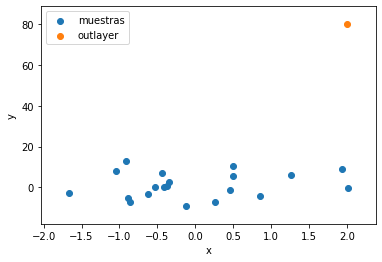

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

# conjunto de datos
n_samples = 20
n_outlayers = 1

X, y = make_regression(n_samples=n_samples, n_features=1, n_informative=1, n_targets=1, noise=5, random_state=43)

X_outlayers = np.array([[2]])
y_outlayers = np.array([80])

X = np.vstack((X, X_outlayers))
y = np.hstack((y, y_outlayers))

# configuración del gráfico
plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

# muestras
plt.scatter(X[:n_samples,0], y[:n_samples], zorder=10, label="muestras")
plt.scatter(X[n_samples:,0], y[n_samples:], zorder=10, label="outlayer")

# mostrar el gráfico
plt.legend()
plt.show()

La regresión lineal aplicada a dicho conjunto de datos dará como resultado el siguiente modelo de regresión:

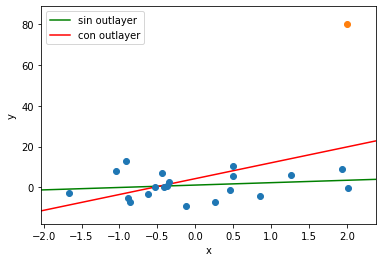

In [2]:
from sklearn.linear_model import LinearRegression

# configuración del gráfico
plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

# muestras
plt.scatter(X[:n_samples,0], y[:n_samples], zorder=10)
plt.scatter(X[n_samples:,0], y[n_samples:], zorder=10)

# regresion sin outlayers
reg = LinearRegression().fit(X[:n_samples,:], y[:n_samples])
line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, reg.intercept_ + reg.coef_[0] * line, c='green', label="sin outlayer")

# regresion con outlayers
reg_outlayers = LinearRegression().fit(X, y)
line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, reg_outlayers.intercept_ + reg_outlayers.coef_[0] * line, c='red', label="con outlayer")

# mostrar el gráfico
plt.legend()
plt.show()

Para tratar de evitar este sobreajuste, es posible introducir una **regularización** dentro del modelo de regresión lineal. Empíricamente se sabe que, entre otros motivos, los problemas de sobreajuste vienen dados por magnitudes elevadas en los parámetros aprendidos. Por ejemplo, en el caso de la regresión lineal se sabe que a mayor $\beta$ (en términos absolutos) el modelo se ajusta más (se sobreajusta) a los datos. 

Antes de poder explicar cómo introducir la regularización en el modelo de regresión lineal, debemos introducir un nuevo concepto: **la función de pérdida** (*loss function*). Hasta ahora, hemos estudiado la resolución de la regresión lineal como un sistema de ecuaciones sobredimensionado. Sin embargo, es posible plantear el mismo modelo (y obtener la misma solución) planteando el problema como un problema de optimización. Para ello definimos una función de coste que mide cómo de bueno es nuestro modelo:

$$
L(Y, X) = \left( \beta \cdot X -  Y \right)^2
$$

La función de perdida busca minimizar los errores en las predicciones del modelo ($\beta \cdot X$). Dicho de otro modo, el modelo será mejor cuanto más certeras sean sus predicciones.

Por tanto, buscamos encontrar los valores de $\beta$ que minimicen la función de pérdida:

$$
\min_{\beta} (\beta \cdot X - Y)^2
$$

Para evitar el sobreajuste se modifica la función de perdida de tal modo que se **penalice** a aquellos modelos que tengan valores altos (positivos o negativos) de $\beta$. Dicho de otro modo, el modelo no solo buscará hacer buenas predicciones si no que, además, buscará que esas predicciones se realicen con el $\beta$ más pequeño posible.

## *Ridge regression*

Una de las variantes más conocidas de la regresión lineal es conocida como *Ridge Regression*, la cuál añade un término de regularización que evita el *overfitting* controlado por un **híper-parámetro** $\alpha$.

*Ridge regression* modifica la la función de perdida del modelo para plantear el siguiente problema de optimización:

$$
\min_{\beta} (\beta \cdot X - Y)^2 + \alpha \cdot ||\beta||_2^2
$$

Observamos que se busca penalizar a los modelos cuyos valores de $\beta$ al cuadrado sean más grandes. A esto se le conoce como regularización $\ell2$. El híper-parámetro $\alpha$ controla el peso de la regularización en el modelo, obteniendo con $\alpha=0$ el modelo de regresión lineal sin regularización.

En `sklearn` *Ridge regression* se encuentra implementado en `linear_model.Ridge`. Veamos su funcionamiento:

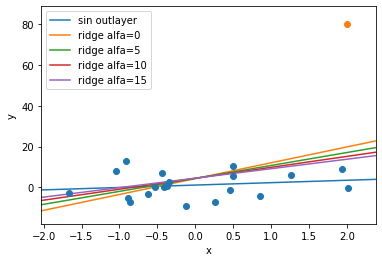

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# configuración del gráfico
plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

# muestras
plt.scatter(X[:n_samples,0], y[:n_samples], zorder=10)
plt.scatter(X[n_samples:,0], y[n_samples:], zorder=10)

# regresion sin outlayers
reg = LinearRegression().fit(X[:n_samples,:], y[:n_samples])
line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, reg.intercept_ + reg.coef_[0] * line, label="sin outlayer")

# regresion con outlayers
for alpha in np.arange(0,20,5):
    ridge = Ridge(alpha=alpha).fit(X, y)
    line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
    plt.plot(line, ridge.intercept_ + ridge.coef_[0] * line, label="ridge alfa=" + str(alpha))

# mostrar el gráfico
plt.legend()
plt.show()

## Lasso

Otra variante de la regresión lineal se conoce como Lasso. Lasso es un modelo lineal que estima los coeficientes dispersos. Es útil en algunos contextos debido a su tendencia a preferir soluciones con menos coeficientes distintos de cero, reduciendo efectivamente el número de características de las que depende la solución dada.

Al igual que *Ridge regression*, añade un híper-parámetro para gestionar el sobre-entrenamiento (o *overfitting*) modificando la función de perdida y buscando resolver el siguiente problema de minimización:

$$
\min_{\beta} \frac{1}{2n_{samples}} ||\beta \cdot X - Y||_2^2 + \alpha \cdot ||\beta||_1
$$

En este caso la regularización empleada es $\ell1$ que se diferencia de la regularización $\ell2$ al sancionar el valor absoluto al parámetros $\beta$ y no con su valor al cuadrado.

En `sklearn` Lasso se encuentra implementado en `linear_model.Lasso`. Veamos su funcionamiento:

<ipython-input-4-d59be3fbcf1d>:32: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso = Lasso(alpha=alpha).fit(X, y)
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


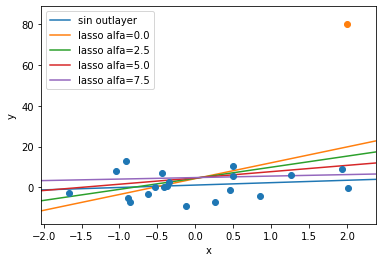

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

# configuración del gráfico
plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

# muestras
plt.scatter(X[:n_samples,0], y[:n_samples], zorder=10)
plt.scatter(X[n_samples:,0], y[n_samples:], zorder=10)

# regresion sin outlayers
reg = LinearRegression().fit(X[:n_samples,:], y[:n_samples])
line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, reg.intercept_ + reg.coef_[0] * line, label="sin outlayer")

# regresion con outlayers
for alpha in np.arange(0,10,2.5):
    lasso = Lasso(alpha=alpha).fit(X, y)
    line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
    plt.plot(line, lasso.intercept_ + lasso.coef_[0] * line, label="lasso alfa=" + str(alpha))

# mostrar el gráfico
plt.legend()
plt.show()

## Elastic-Net

El regresor denominado *Elastic-Net* combina en su función de coste las regularizaciones propuestas por los regresores *Ridge* (*$\ell2$ regularization*) y *Lasso* (*$\ell1$ regularization*). El peso de cada una de las regularizaciones es ponderado mediante un híper-parámetro *r*.

La función de coste asociada a *Elastic-Net* que queremos minimizar será:

$$\hat{y}_i = \sum_{f=1}^F \beta_f \cdot x_{i,f}$$

$$\min_\beta \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 + r \cdot \alpha \sum_{f=1}^F |\beta_f| + \frac{1-r}{2} \alpha \sum_{f=1}^F \beta_f^2$$

Donde $N$ es el número de muestras de nuestro conjunto de datos y $F$ es el número de *features* del mismo.

Nótese que el modelo descrito dispone de dos hiper-parámetros que permiten ajustar la importancia de los coeficientes de regularización:

- $\alpha$ permite definir el peso de la regularización (tanto $\ell1$ como $\ell2$) en la función de coste para evitar el *overfitting*.
- $r$ permite controlar la importancia de la regularización $\ell1$ frente a la regularización $\ell2$. Valores cercanos a 0 darán más importancia a la segunda mientras que valores cercanos a 1 darán más importancia a la primera.

En `sklearn` ElasticNet se encuentra implementado en `linear_model.ElasticNet`. Veamos su funcionamiento:

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2683.184004567095, tolerance: 0.6709244398915684
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3289.508034197039, tolerance: 0.6709244398915684
  model = cd_fast.enet_coordinate_descent(


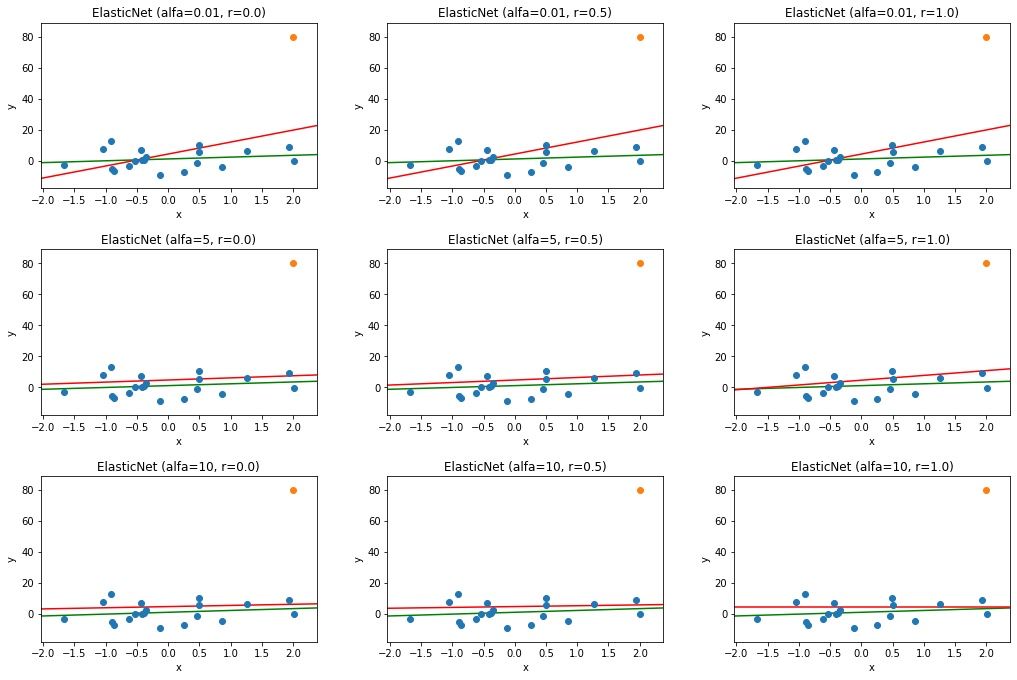

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

def plot_regression(ax, alpha, r):
    
    ax.set_xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
    ax.set_ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

    ax.set_title('ElasticNet (alfa=' + str(alpha) + ', r=' + str(r) + ')')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # muestras
    ax.scatter(X[:n_samples,0], y[:n_samples], zorder=10)
    ax.scatter(X[n_samples:,0], y[n_samples:], zorder=10)
    
    # regresion sin outlayers
    reg = LinearRegression().fit(X[:n_samples,:], y[:n_samples])
    line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
    ax.plot(line, reg.intercept_ + reg.coef_[0] * line, c="green")

    # elastic net
    elastic = ElasticNet(alpha=alpha, l1_ratio=r).fit(X, y)
    line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
    ax.plot(line, elastic.intercept_ + elastic.coef_[0] * line, c="red")
    

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
fig.tight_layout(pad=4.0)

plot_regression(axs[0][0], 0.01, 0.0)
plot_regression(axs[0][1], 0.01, 0.5)
plot_regression(axs[0][2], 0.01, 1.0)

plot_regression(axs[1][0], 5, 0.0)
plot_regression(axs[1][1], 5, 0.5)
plot_regression(axs[1][2], 5, 1.0)

plot_regression(axs[2][0], 10, 0.0)
plot_regression(axs[2][1], 10, 0.5)
plot_regression(axs[2][2], 10, 1.0)

---

Creado por **Fernando Ortega** (fernando.ortega@upm.es) y **Raúl Lara Cabrera** (raul.lara@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">